In [1]:
import numpy as np
import matplotlib.pyplot as plt

Primero se calculan las alturas de desplazamiento plano-cero $z_d$ y de rugosidad $z_0$ en función de la altura de vegetación $z_{veg}$.

In [8]:
zveg = 0.5
zd = 0.7 * zveg
z0 = 0.1 * zveg

print(f'La altura de desplazamiento plano-cero es {zd:3.2f} m y la altura de rugosidad es {z0:3.2f} m')
print(f'Por consiguiente, la superficie virtual (u = 0m/s) tiene una altura de {zd + z0: 3.2f} m')

La altura de desplazamiento plano-cero es 0.35 m y la altura de rugosidad es 0.05 m
Por consiguiente, la superficie virtual (u = 0m/s) tiene una altura de  0.40 m


Debido a que la elevación de la superficie virtual es menor a la altura de medición de velocidad del viento, se puede continuar con el siguiente paso que consiste en calcular la velocidad de fricción $u^*$:


In [9]:
k = 0.41 # Constante de von Karman
zm = 2 # Altura de medición de la velocidad del viento (m)
u_zm = 4 # velocidad medida a la altura zm (m/s)
u_f = (k * u_zm) / np.log((zm - zd)/z0)

print(f'La velocidad de fricción u* es {u_f:3.2f} m/s')

La velocidad de fricción u* es 0.47 m/s


Ahora se puede calcular el perfil de velocidad utilizando la distribución de Prandtl - von Karman:

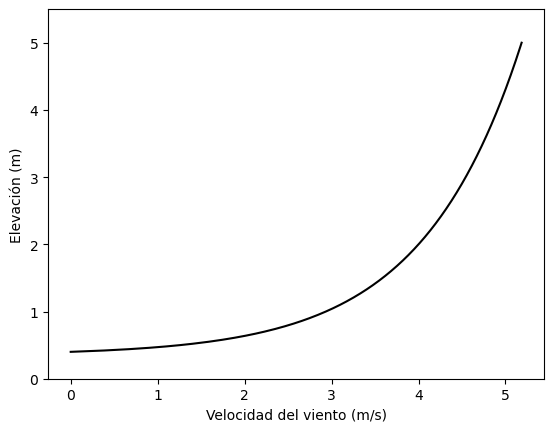

In [10]:
zt = 5 # altura máxima para calcular el perfil de velocidad (m)
dz = 0.01 # paso de altura (m)
z = np.arange(zd + z0, 5 + dz, dz) # se genera vector de elevaciones

u = (1/k) * u_f * np.log((z - zd)/z0) # ley de distribución de velocidades

# Gráfica del perfil de velocidad
plt.plot(u, z, 'k-')
plt.xlabel('Velocidad del viento (m/s)')
plt.ylabel('Elevación (m)')
plt.ylim([0, 1.1*np.max(z)])
plt.show()

Para calcular el esfuerzo de corte $\tau_0$ en la superficie, primero se debe obtener la densidad del aire $\rho_a$ a partir de los datos de temperatura y presión atmosférica dadas: 

In [11]:
T = 25 # Temperatura del aire (C)
p = 101.3 # Presión atmosférico (kPa)
Ra = 287
rho_a = p * 1000 /(Ra * (T + 273.15))

tau0 = -rho_a * u_f**2

print(f'La densidad del aire es {rho_a:3.2f} kg m-3 y el esfuerzo de corte en la superficie es {tau0: 3.2} Pa')


La densidad del aire es 1.18 kg m-3 y el esfuerzo de corte en la superficie es -0.26 Pa


El perfil de difusividad de _momentum_ es el siquiente:

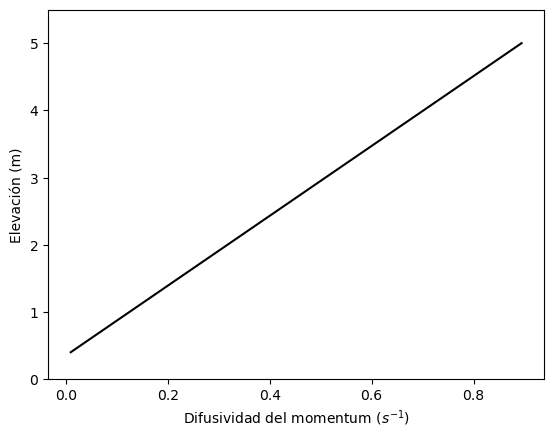

In [14]:
Dm = k * u_f * (z - zd)

# Gráfica del perfil de velocidad
plt.plot(Dm, z, 'k-')
plt.xlabel('Difusividad del momentum ($s^{-1}$)')
plt.ylabel('Elevación (m)')
plt.ylim([0, 1.1*np.max(z)])
plt.show()

In [ ]:


# Gráfica del perfil del campo de flujo de momentum
plt.plot(Dm, z, 'k-')
plt.xlabel('Difusividad del momentum ($s^{-1}$)')
plt.ylabel('Elevación (m)')
plt.ylim([0, 1.1*np.max(z)])
plt.show()